In [1]:
import pandas as pd

In [3]:
def read_dataset(train_data_path):
    chunksize = 500000
    chunk_list = []  
    for chunk in pd.read_csv(train_data_path, chunksize=chunksize, low_memory=False):
        chunk_list.append(chunk)  
    train_data = pd.concat(chunk_list, ignore_index=True) 
    return train_data

In [5]:
Train_Dataset=read_dataset("G:/Classifying Cyber Security Incident Project/GUIDE_Train.csv") 
Train_Dataset

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,31,6,3
1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,NaN,FalsePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,1056561957389,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,T1189,FalsePositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
3,1279900258736,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,214748368522,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9516832,1056561956622,0,90,496631,2024-06-08T15:26:08.000Z,7,6,InitialAccess,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
9516833,1228360650033,59,196410,748366,2024-06-06T09:40:08.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
9516834,867583395122,44,14117,7425,2024-06-11T22:51:03.000Z,78,57,Exfiltration,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
9516835,395136991850,43,644,8973,2024-05-20T23:01:01.000Z,52,10,Impact,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [9]:
Train_Dataset["IncidentGrade"].unique()

array(['TruePositive', 'FalsePositive', 'BenignPositive', nan],
      dtype=object)

In [9]:
from sklearn.utils import resample 

target_column="IncidentGrade" 

class_1= Train_Dataset[Train_Dataset[target_column]=="TruePositive"] 
class_2=Train_Dataset[Train_Dataset[target_column]=="FalsePositive"] 
class_3=Train_Dataset[Train_Dataset[target_column]=="BenignPositive"] 

class_1_resampled=resample(class_1,n_samples=500000, random_state=42)
class_2_resampled=resample(class_2,n_samples=500000,random_state=42) 
class_3_resampled=resample(class_3,n_samples=500000,random_state=42) 

total_train_dataset=pd.concat([class_1_resampled,class_2_resampled,class_3_resampled]) 

train_dataset=total_train_dataset.sample(frac=1, random_state=42) 

train_dataset

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
53128,1666447315115,395,23347,96321,2024-06-13T14:02:05.000Z,6,5,InitialAccess,T1566,FalsePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
3574159,773094114354,56,11851,7912,2024-06-12T19:35:46.000Z,853,270,CredentialAccess,T1110,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
7895832,1443109014901,2,10006,7570,2024-06-06T19:09:18.000Z,15,13,Exfiltration,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
1697425,85899348503,8,15327,257875,2024-06-02T23:30:59.000Z,3,4,SuspiciousActivity,NaN,TruePositive,...,NaN,NaN,5,66,NaN,Suspicious,NaN,242,1445,10630
884793,1142461305553,38,288861,680262,2024-06-12T01:59:57.000Z,182,153,CredentialAccess,T1528,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3633533,798863917568,416,108375,753064,2024-06-05T16:17:33.000Z,426,452,CredentialAccess,T1111;T1557,TruePositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
3856220,1065151894326,112,223784,446118,2024-06-07T10:44:26.000Z,6,5,InitialAccess,T1566,BenignPositive,...,NaN,NaN,5,66,NaN,NaN,NoThreatsFound,242,1445,10630
5224285,773094113955,22,330,168566,2024-06-07T10:36:23.000Z,0,0,InitialAccess,T1078;T1078.004,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,1,0,0
2640710,1099511629651,684,236850,1057887,2024-06-11T16:42:58.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,17,229,8150


In [11]:
train_dataset = train_dataset.reset_index(drop=True) 
train_dataset

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,1666447315115,395,23347,96321,2024-06-13T14:02:05.000Z,6,5,InitialAccess,T1566,FalsePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
1,773094114354,56,11851,7912,2024-06-12T19:35:46.000Z,853,270,CredentialAccess,T1110,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,1443109014901,2,10006,7570,2024-06-06T19:09:18.000Z,15,13,Exfiltration,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
3,85899348503,8,15327,257875,2024-06-02T23:30:59.000Z,3,4,SuspiciousActivity,NaN,TruePositive,...,NaN,NaN,5,66,NaN,Suspicious,NaN,242,1445,10630
4,1142461305553,38,288861,680262,2024-06-12T01:59:57.000Z,182,153,CredentialAccess,T1528,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499995,798863917568,416,108375,753064,2024-06-05T16:17:33.000Z,426,452,CredentialAccess,T1111;T1557,TruePositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
1499996,1065151894326,112,223784,446118,2024-06-07T10:44:26.000Z,6,5,InitialAccess,T1566,BenignPositive,...,NaN,NaN,5,66,NaN,NaN,NoThreatsFound,242,1445,10630
1499997,773094113955,22,330,168566,2024-06-07T10:36:23.000Z,0,0,InitialAccess,T1078;T1078.004,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,1,0,0
1499998,1099511629651,684,236850,1057887,2024-06-11T16:42:58.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,17,229,8150


In [17]:
train_dataset.to_csv("train_dataset.csv",index=False)

In [1]:
import pandas as pd

def read_dataset(test_data_path):
    chunksize = 500000
    chunk_list = []  
    for chunk in pd.read_csv(test_data_path, chunksize=chunksize, low_memory=False):
        chunk_list.append(chunk)  
    test_data = pd.concat(chunk_list, ignore_index=True) 
    return test_data

In [3]:
Test_Dataset=read_dataset("G:/Classifying Cyber Security Incident Project/GUIDE_Test.csv") 
Test_Dataset

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Private
1,1400159342154,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,0,0,NaN,Suspicious,Suspicious,242,1445,10630,Public
2,1279900255923,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,T1021;T1027.002;T1027.005;T1105,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Public
3,60129547292,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4,515396080539,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,T1087;T1087.002,BenignPositive,...,Suspicious,5,66,NaN,NaN,NaN,242,1445,10630,Public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147987,541165881145,262,3017,227156,2024-06-04T03:53:15.000Z,139,120,InitialAccess,T1566.002,BenignPositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4147988,438086666953,1323,31001,304819,2024-06-04T19:32:19.000Z,219,196,InitialAccess,NaN,BenignPositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Private
4147989,1297080124487,47,3653,7243,2024-06-15T00:50:22.000Z,57,29,CommandAndControl,T1046;T1071;T1210,FalsePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4147990,627065226886,70,4243,19142,2024-06-11T16:18:12.000Z,1,1,InitialAccess,T1566.002,BenignPositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Private


In [7]:
from sklearn.utils import resample 

target_column="IncidentGrade" 

class_1= Test_Dataset[Test_Dataset[target_column]=="TruePositive"]
class_2=Test_Dataset[Test_Dataset[target_column]=="FalsePositive"] 
class_3=Test_Dataset[Test_Dataset[target_column]=="BenignPositive"] 

class_1_resampled=resample(class_1,n_samples=500000,random_state=42)
class_2_resampled=resample(class_2,n_samples=500000,random_state=42) 
class_3_resampled=resample(class_3,n_samples=500000,random_state=42) 

total_test_dataset=pd.concat([class_1_resampled,class_2_resampled,class_3_resampled]) 

test_dataset=total_test_dataset.sample(frac=1, random_state=42) 

test_dataset


,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
1327,996432416945,573,37794,1042788,2024-06-06T02:36:32.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,...,NaN,5,66,NaN,NaN,NaN,0,1,1349,Public
2196876,841813591828,0,91,389681,2024-06-07T16:35:53.000Z,4,3,InitialAccess,NaN,TruePositive,...,NaN,5,66,NaN,NaN,NaN,5,1445,10630,Public
3095284,1382979472797,302,1101,249487,2024-06-07T11:18:10.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Public
1356614,103079215716,558,116109,117294,2024-06-03T20:04:28.000Z,6,5,InitialAccess,T1566,TruePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Private
1330684,1494648622924,752,30572,63284,2024-06-03T11:56:04.000Z,1,1,InitialAccess,T1566.002,TruePositive,...,NaN,5,66,Inbound,NaN,NoThreatsFound,242,1445,10630,Public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1064331,68719477550,406,632,46153,2024-05-26T05:26:40.000Z,224,203,Impact,NaN,TruePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Private
3138281,1013612282713,61,202091,585037,2024-06-12T12:12:23.000Z,5,31,SuspiciousActivity,NaN,BenignPositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Private
1751810,953482741463,0,93,1200246,2024-06-08T00:29:24.000Z,14,12,CredentialAccess,T1110;T1110.003;T1110.001,TruePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
2304794,1425929142965,329,200102,886139,2024-06-13T02:30:04.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Private


In [9]:
test_dataset= test_dataset.reset_index(drop=True) 
test_dataset

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,996432416945,573,37794,1042788,2024-06-06T02:36:32.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,...,NaN,5,66,NaN,NaN,NaN,0,1,1349,Public
1,841813591828,0,91,389681,2024-06-07T16:35:53.000Z,4,3,InitialAccess,NaN,TruePositive,...,NaN,5,66,NaN,NaN,NaN,5,1445,10630,Public
2,1382979472797,302,1101,249487,2024-06-07T11:18:10.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Public
3,103079215716,558,116109,117294,2024-06-03T20:04:28.000Z,6,5,InitialAccess,T1566,TruePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Private
4,1494648622924,752,30572,63284,2024-06-03T11:56:04.000Z,1,1,InitialAccess,T1566.002,TruePositive,...,NaN,5,66,Inbound,NaN,NoThreatsFound,242,1445,10630,Public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499995,68719477550,406,632,46153,2024-05-26T05:26:40.000Z,224,203,Impact,NaN,TruePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Private
1499996,1013612282713,61,202091,585037,2024-06-12T12:12:23.000Z,5,31,SuspiciousActivity,NaN,BenignPositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Private
1499997,953482741463,0,93,1200246,2024-06-08T00:29:24.000Z,14,12,CredentialAccess,T1110;T1110.003;T1110.001,TruePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
1499998,1425929142965,329,200102,886139,2024-06-13T02:30:04.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Private


In [11]:
test_dataset.to_csv("test_dataset.csv",index=False)

In [1]:
                                          TRAIN DATASET 

import pandas as pd 

DfT= pd.read_csv("train_dataset.csv") 
DfT.head()

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,1666447315115,395,23347,96321,2024-06-13T14:02:05.000Z,6,5,InitialAccess,T1566,FalsePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
1,773094114354,56,11851,7912,2024-06-12T19:35:46.000Z,853,270,CredentialAccess,T1110,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,1443109014901,2,10006,7570,2024-06-06T19:09:18.000Z,15,13,Exfiltration,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
3,85899348503,8,15327,257875,2024-06-02T23:30:59.000Z,3,4,SuspiciousActivity,NaN,TruePositive,...,NaN,NaN,5,66,NaN,Suspicious,NaN,242,1445,10630
4,1142461305553,38,288861,680262,2024-06-12T01:59:57.000Z,182,153,CredentialAccess,T1528,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [5]:
                                          #STRUCTURE OF DATASET

print("Shape of the Dataset:",DfT.shape) 

print("Column data types:") 

print(DfT.dtypes)


Shape of the Dataset: (1500000, 45)
Column data types:
Id                      int64
OrgId                   int64
IncidentId              int64
AlertId                 int64
Timestamp              object
DetectorId              int64
AlertTitle              int64
Category               object
MitreTechniques        object
IncidentGrade          object
ActionGrouped          object
ActionGranular         object
EntityType             object
EvidenceRole           object
DeviceId                int64
Sha256                  int64
IpAddress               int64
Url                     int64
AccountSid              int64
AccountUpn              int64
AccountObjectId         int64
AccountName             int64
DeviceName              int64
NetworkMessageId        int64
EmailClusterId        float64
RegistryKey             int64
RegistryValueName       int64
RegistryValueData       int64
ApplicationId           int64
ApplicationName         int64
OAuthApplicationId      int64
ThreatFamily   

In [7]:
feature_names=DfT.columns 

print("Feature Names:") 
print(feature_names)

Feature Names:
Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId',
       'AlertTitle', 'Category', 'MitreTechniques', 'IncidentGrade',
       'ActionGrouped', 'ActionGranular', 'EntityType', 'EvidenceRole',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'EmailClusterId', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationId', 'ApplicationName',
       'OAuthApplicationId', 'ThreatFamily', 'FileName', 'FolderPath',
       'ResourceIdName', 'ResourceType', 'Roles', 'OSFamily', 'OSVersion',
       'AntispamDirection', 'SuspicionLevel', 'LastVerdict', 'CountryCode',
       'State', 'City'],
      dtype='object')


In [9]:
                           #SUMMARY OF NUMERICAL FEATURES 


print("Summary of Numerical Features:") 
DfT.describe()



Summary of Numerical Features:


,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,DeviceId,Sha256,IpAddress,Url,...,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
count,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,...,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06
mean,8.409765e+11,1.931832e+02,7.224839e+04,4.077611e+05,1.042003e+02,2.734681e+03,9.584710e+04,1.292450e+05,2.843197e+05,1.509981e+05,...,3.339083e+03,8.807851e+02,2.635300e+05,1.082591e+05,3.583964e+03,4.903504e+00,6.472111e+01,2.228579e+02,1.347135e+03,9.905699e+03
std,4.955303e+11,4.076819e+02,1.230715e+05,4.585633e+05,4.143693e+02,1.082129e+04,1.588256e+04,3.307867e+04,1.417726e+05,3.631932e+04,...,5.220231e+02,1.328453e+01,7.985592e+04,3.128987e+04,8.119682e+01,6.863853e-01,9.089557e+00,6.408149e+01,3.582683e+02,2.656291e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.209068e+11,1.000000e+01,4.950000e+02,1.992600e+04,2.000000e+00,2.000000e+00,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
50%,8.332237e+11,4.700000e+01,9.696000e+03,2.147635e+05,8.000000e+00,1.100000e+01,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
75%,1.271310e+12,1.840000e+02,8.559625e+04,6.993218e+05,4.500000e+01,1.650000e+02,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
max,1.709397e+12,6.144000e+03,5.996950e+05,1.721450e+06,9.471000e+03,1.131470e+05,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04


In [11]:
                         #DISTRIBUTION OF TARGET VARIABLE 


Target_variable=["TruePositive","FalsePositive","BenignPositive"] 

print("Distribution of Target Variable:") 

print(DfT["IncidentGrade"].value_counts())



Distribution of Target Variable:
IncidentGrade
FalsePositive     500000
TruePositive      500000
BenignPositive    500000
Name: count, dtype: int64


In [13]:
target_related_features=DfT.filter(like="IncidentGrade",axis=1) 

print("Target-related features:")
print(target_related_features.head())


Target-related features:
    IncidentGrade
0   FalsePositive
1    TruePositive
2  BenignPositive
3    TruePositive
4    TruePositive


In [15]:
             #CHECK FOR NUMBER OF UNIQUE VALUES FOR CATEGORICAL COLUMNS 

Categorical_Columns=DfT.select_dtypes(include="object").columns 

print("Unique Values in Categorical Columns:") 

for col in Categorical_Columns:
    print(f"{col}:{DfT[col].nunique()}")



Unique Values in Categorical Columns:
Timestamp:494348
Category:20
MitreTechniques:972
IncidentGrade:3
ActionGrouped:2
ActionGranular:13
EntityType:27
EvidenceRole:2
ThreatFamily:983
ResourceType:21
Roles:8
AntispamDirection:4
SuspicionLevel:2
LastVerdict:5


In [17]:
                         #OVERALL INFORAMTION ABOUT THE DATASET 


print("Overall Information of Dataset:") 

print(DfT.info())

Overall Information of Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500000 entries, 0 to 1499999
Data columns (total 45 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Id                  1500000 non-null  int64  
 1   OrgId               1500000 non-null  int64  
 2   IncidentId          1500000 non-null  int64  
 3   AlertId             1500000 non-null  int64  
 4   Timestamp           1500000 non-null  object 
 5   DetectorId          1500000 non-null  int64  
 6   AlertTitle          1500000 non-null  int64  
 7   Category            1500000 non-null  object 
 8   MitreTechniques     662867 non-null   object 
 9   IncidentGrade       1500000 non-null  object 
 10  ActionGrouped       759 non-null      object 
 11  ActionGranular      759 non-null      object 
 12  EntityType          1500000 non-null  object 
 13  EvidenceRole        1500000 non-null  object 
 14  DeviceId            1500000 non-nu

In [ ]:
                               #EXPLORATORY DATA ANALYSIS

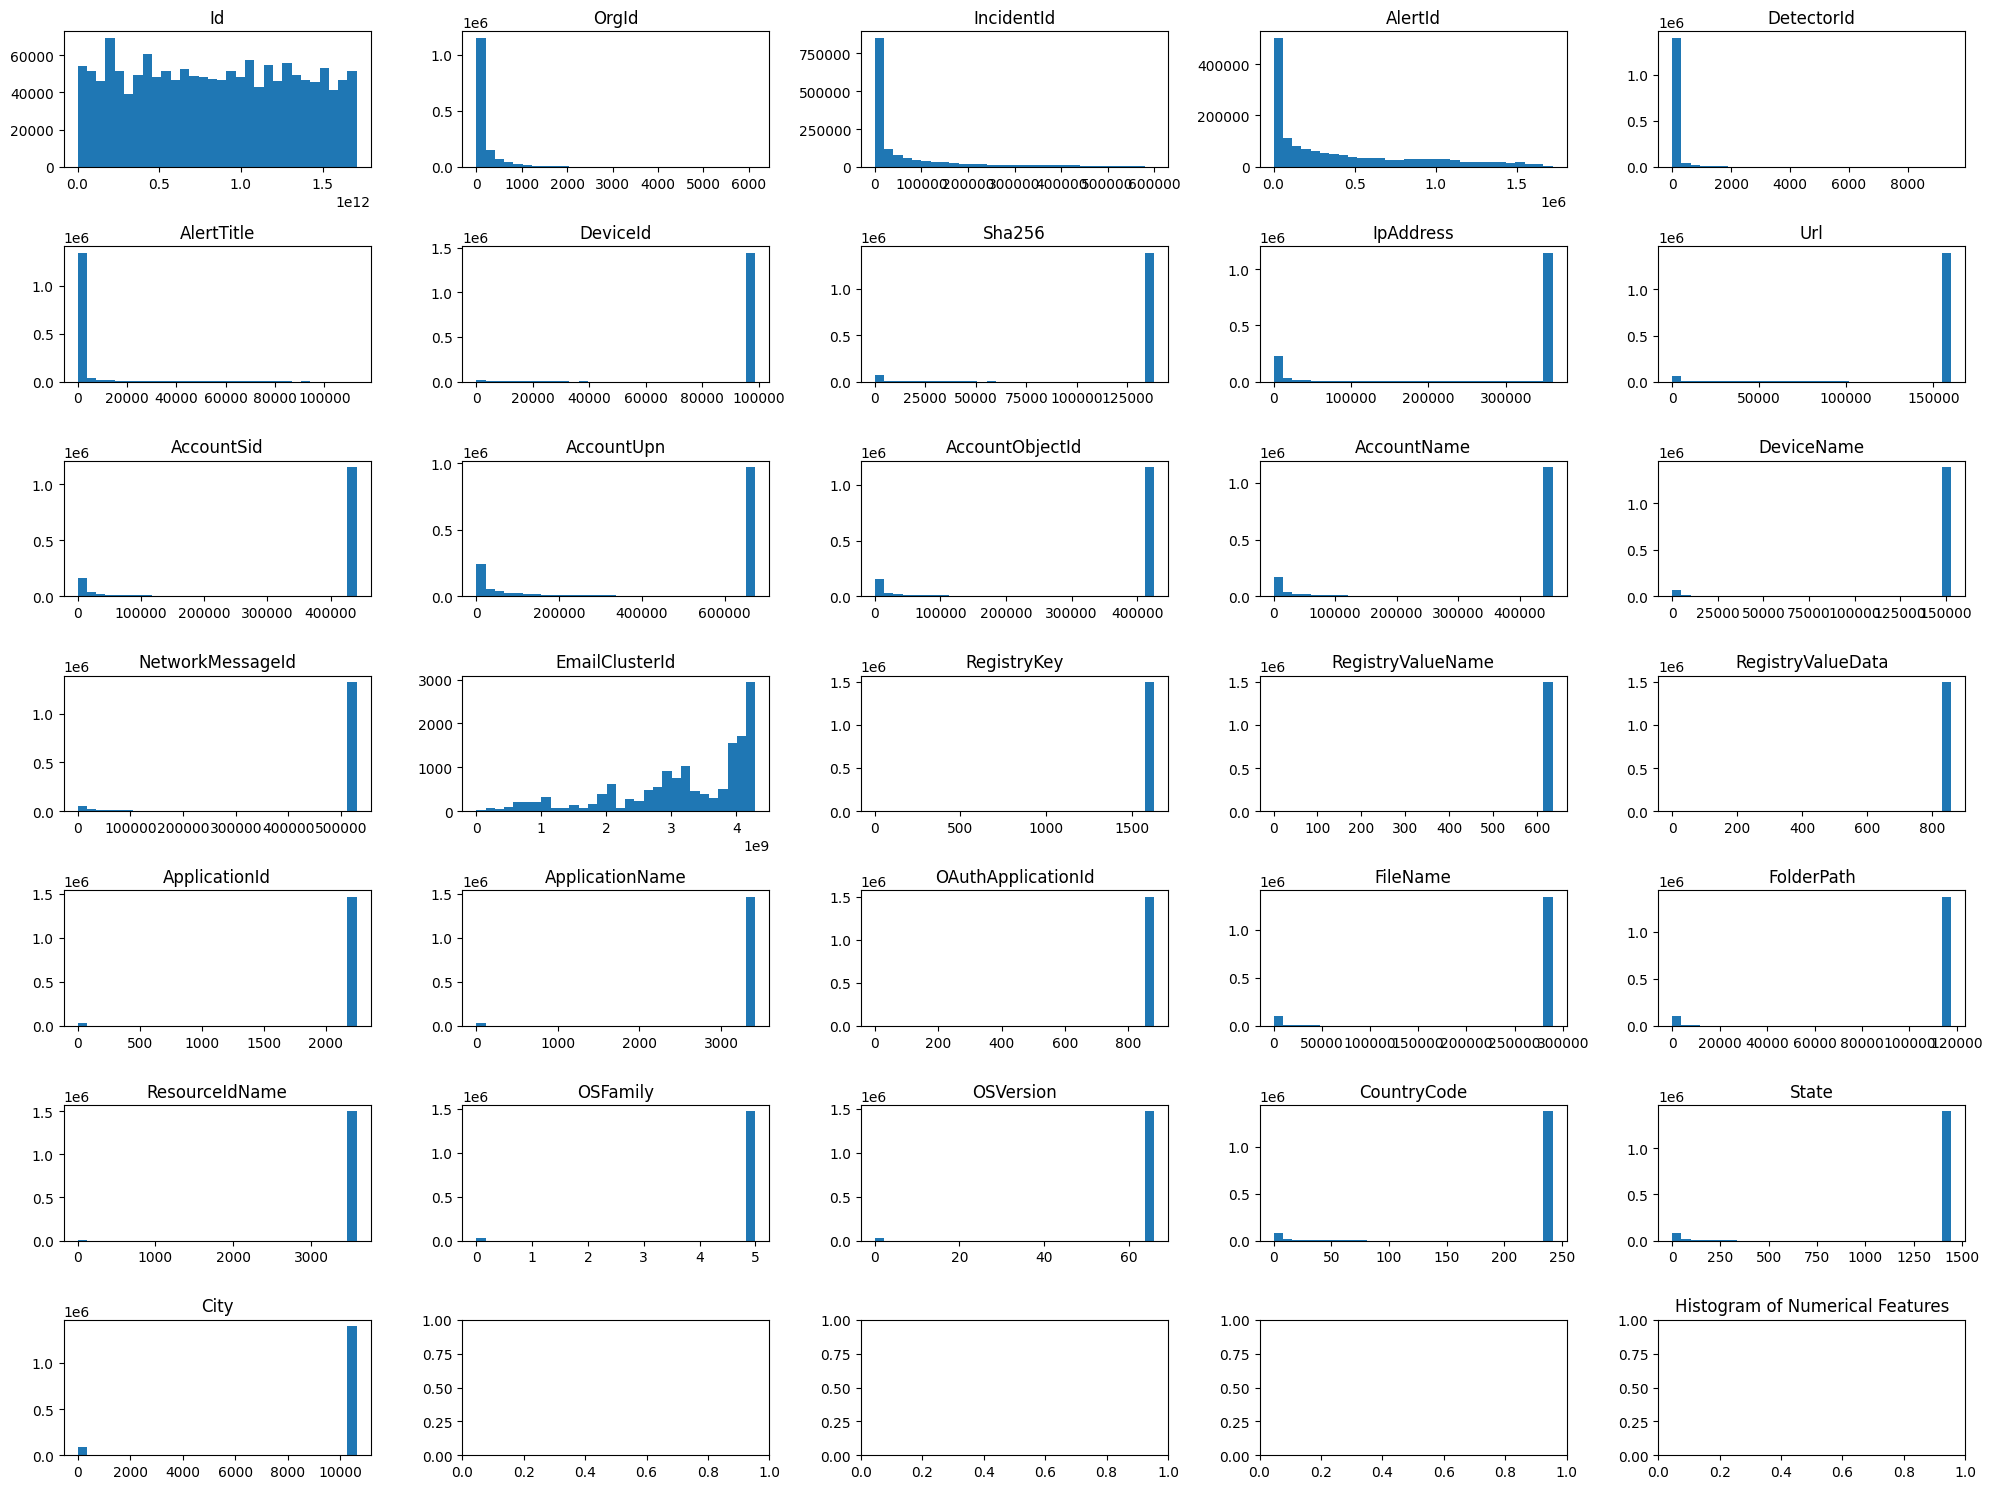

In [45]:
                                         #VISUALIZATIONS OF NUMERICAL FEATURES IN HISTOGRAM

import matplotlib.pyplot as plt 
import seaborn as sns 

Numerical_columns=DfT.select_dtypes(include=["float64","int64"]).columns 

n_cols=5 
n_rows=(len(Numerical_columns)//n_cols) + (len(Numerical_columns)%n_cols>0) 
fig,axes=plt.subplots(n_rows,n_cols,figsize=(20,15)) 

axes=axes.flatten() 

for i, col in enumerate(Numerical_columns):
    axes[i].hist(DfT[col],bins=30) 
    axes[i].set_title(col) 

plt.tight_layout() 

plt.title("Histogram of Numerical Features") 

plt.show()




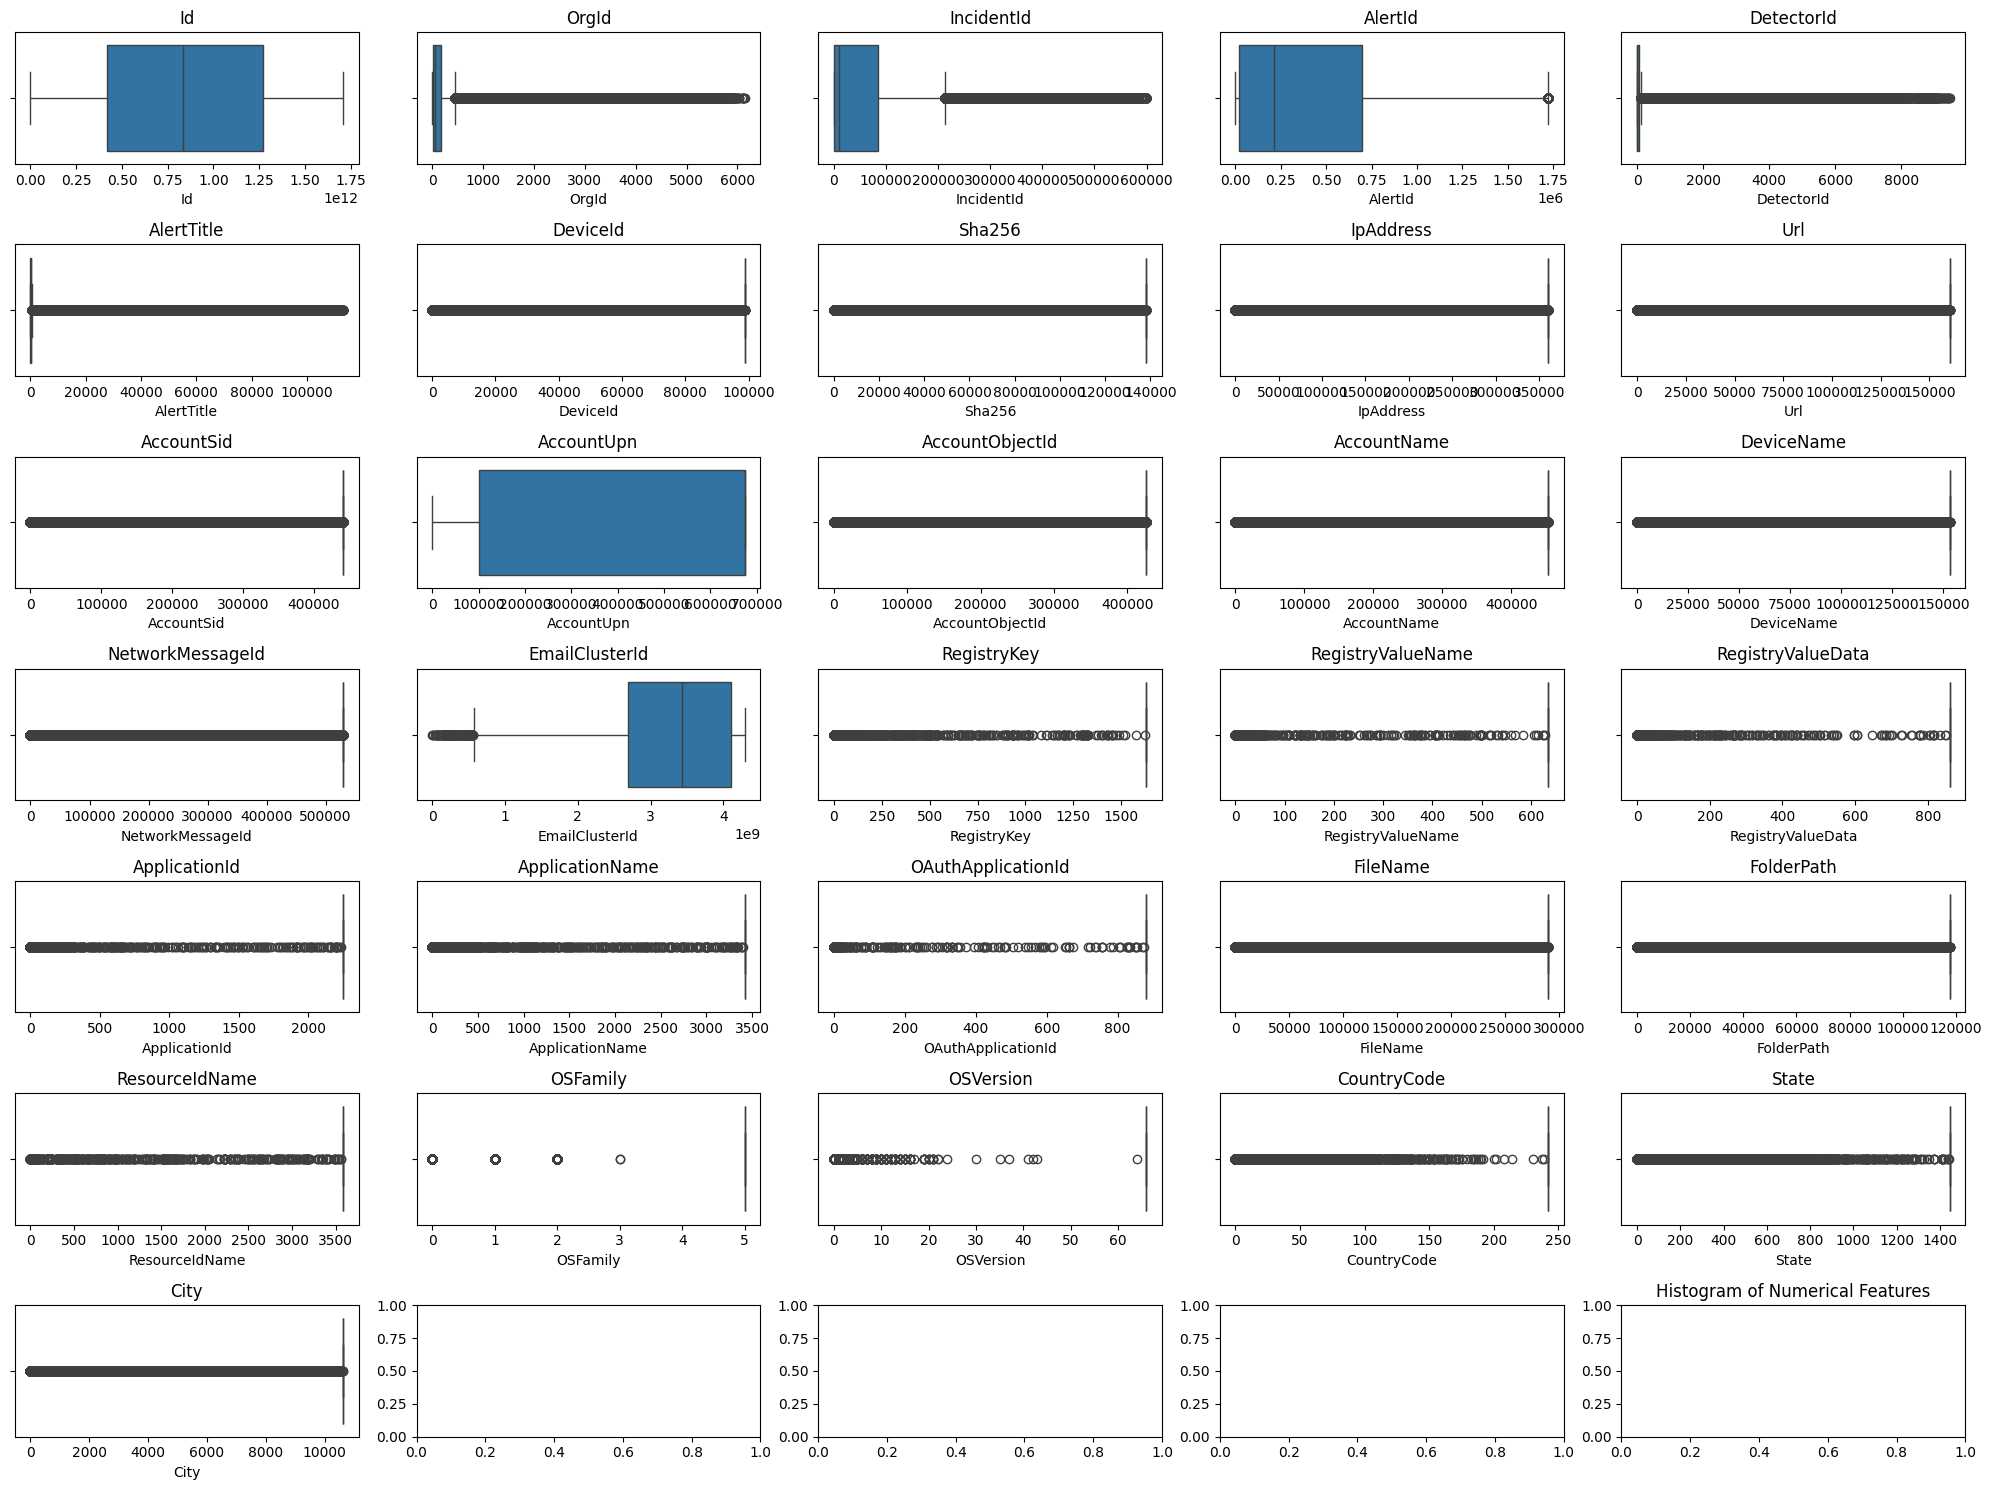

In [21]:
                                    #VISUALIZATIONS OF NUMERICAL FEATURES IN BOXPLOT


import matplotlib.pyplot as plt 
import seaborn as sns 

Numerical_columns=DfT.select_dtypes(include=["float64","int64"]).columns 

n_cols=5 
n_rows=(len(Numerical_columns)//n_cols) + (len(Numerical_columns)%n_cols>0) 
fig,axes=plt.subplots(n_rows,n_cols,figsize=(20,15)) 

axes=axes.flatten() 

for i, col in enumerate(Numerical_columns):
    sns.boxplot(x=DfT[col],ax=axes[i]) 
    axes[i].set_title(col)

plt.tight_layout() 


plt.show()




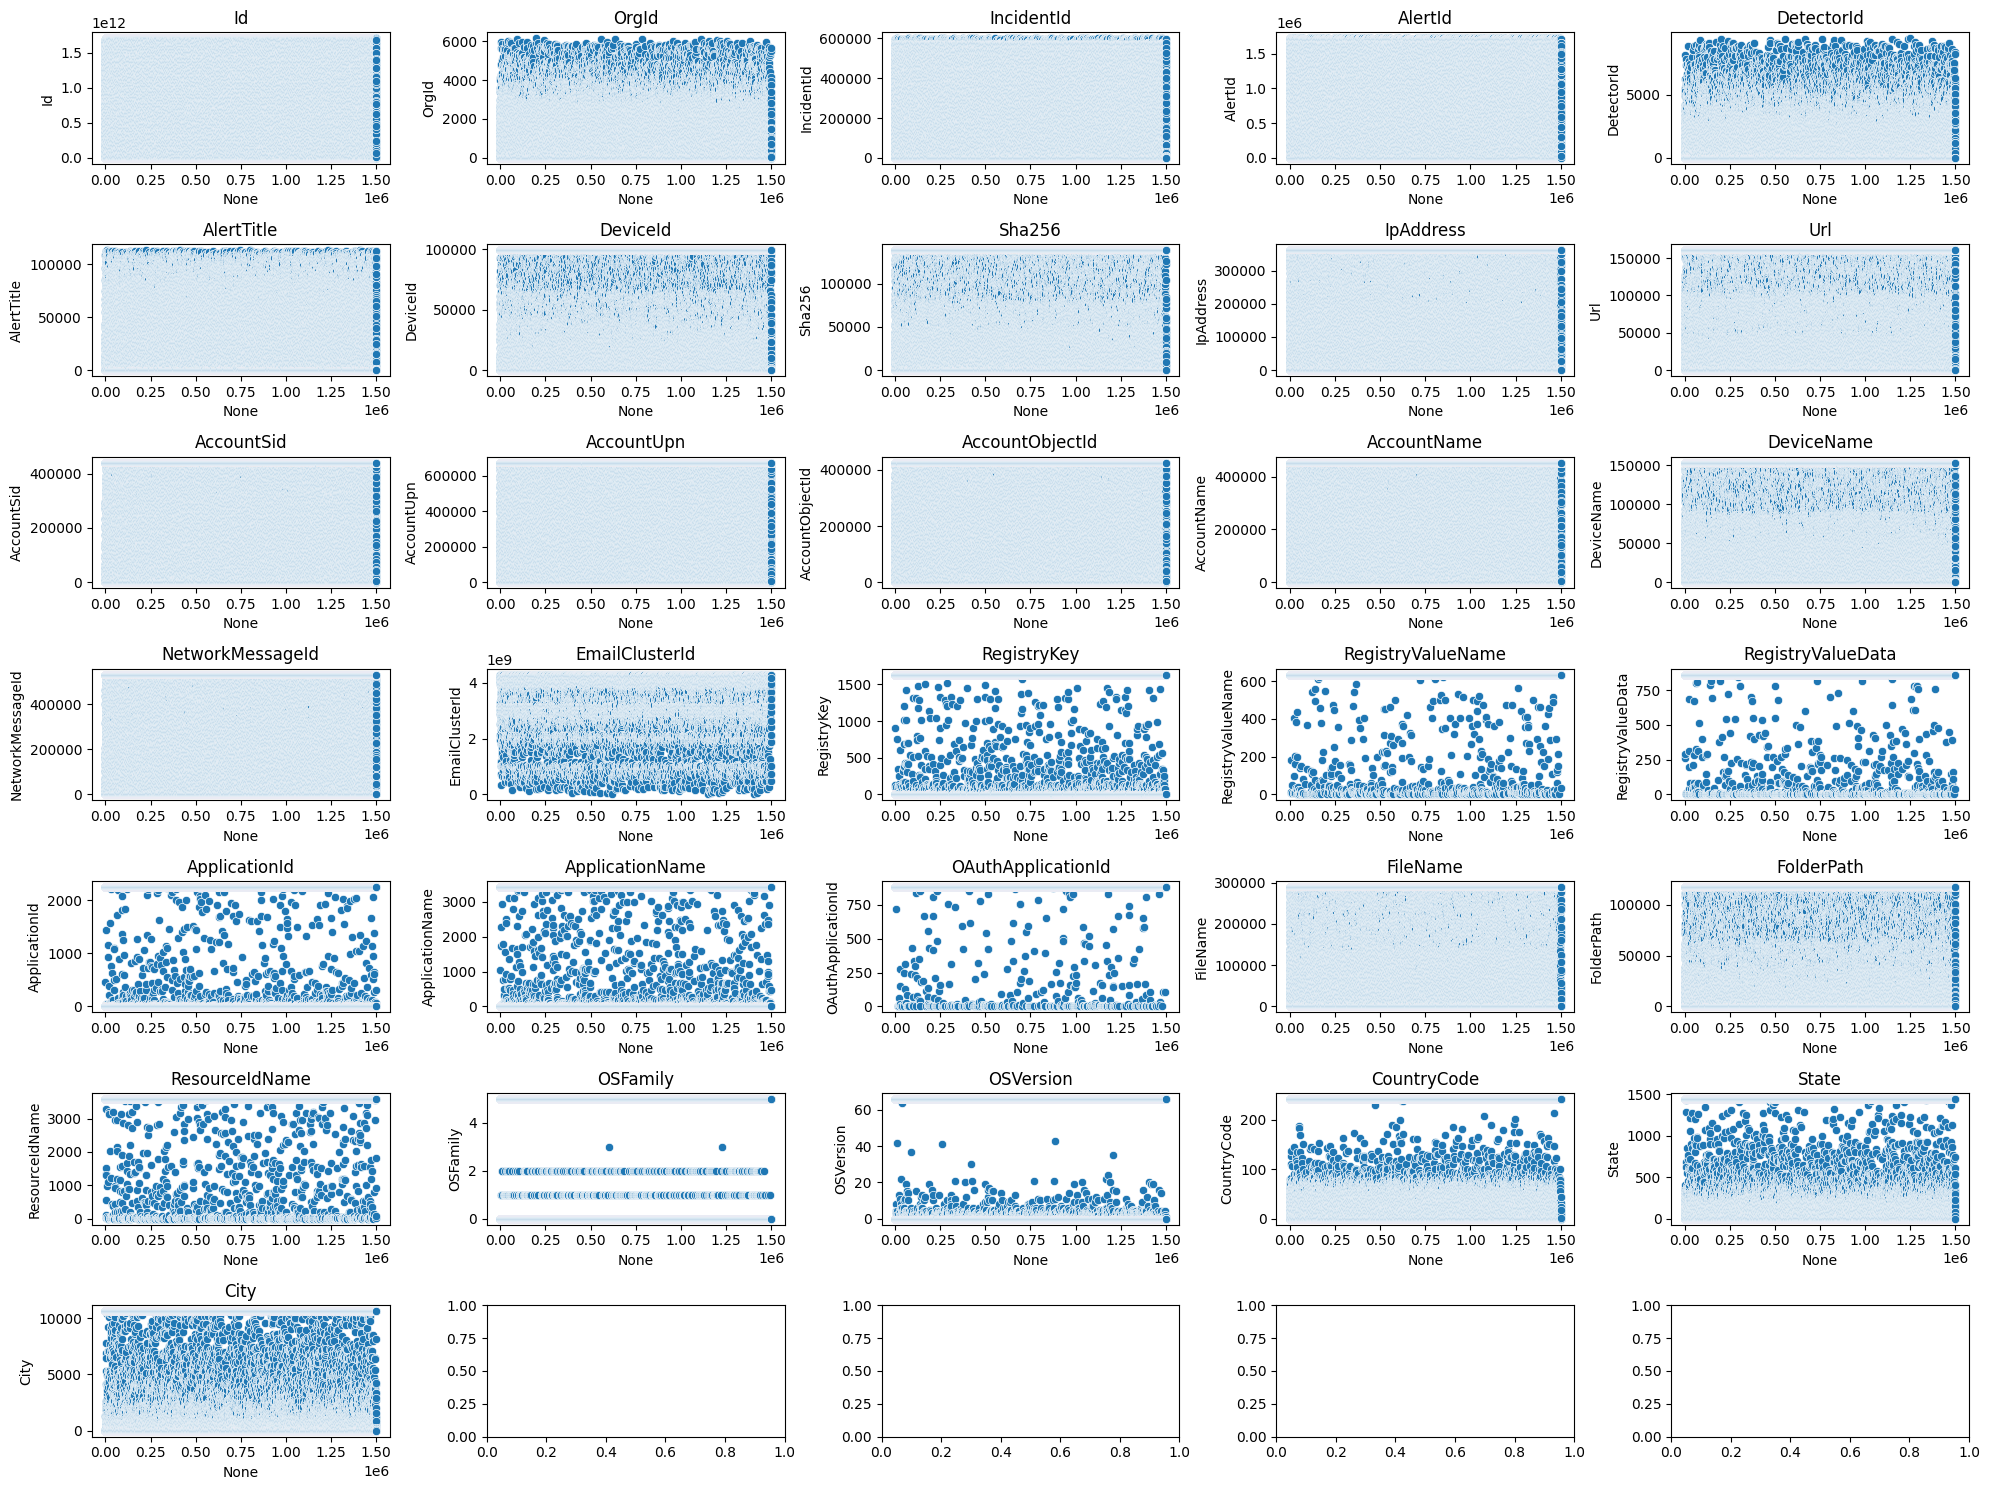

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


Numerical_columns = DfT.select_dtypes(include=["float64", "int64"]).columns

n_cols = 5
n_rows = (len(Numerical_columns) // n_cols) + (len(Numerical_columns) % n_cols > 0)


fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))

axes = axes.flatten()

for i, col in enumerate(Numerical_columns):
    sns.scatterplot(x=DfT.index, y=DfT[col], ax=axes[i])
    axes[i].set_title(col)


plt.tight_layout()
plt.show()

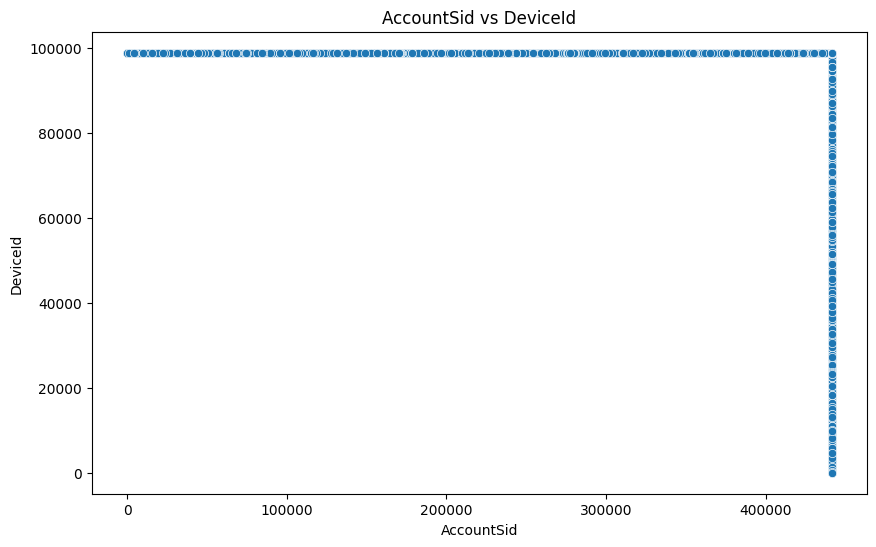

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns 

Numerical_columns=["AccountSid","DeviceId"] 

plt.figure(figsize=(10,6)) 
sns.scatterplot(x=DfT[Numerical_columns[0]],y=DfT[Numerical_columns[1]]) 
plt.title(f"{Numerical_columns[0]} vs {Numerical_columns[1]}")
plt.xlabel(Numerical_columns[0]) 
plt.ylabel(Numerical_columns[1]) 

plt.show()


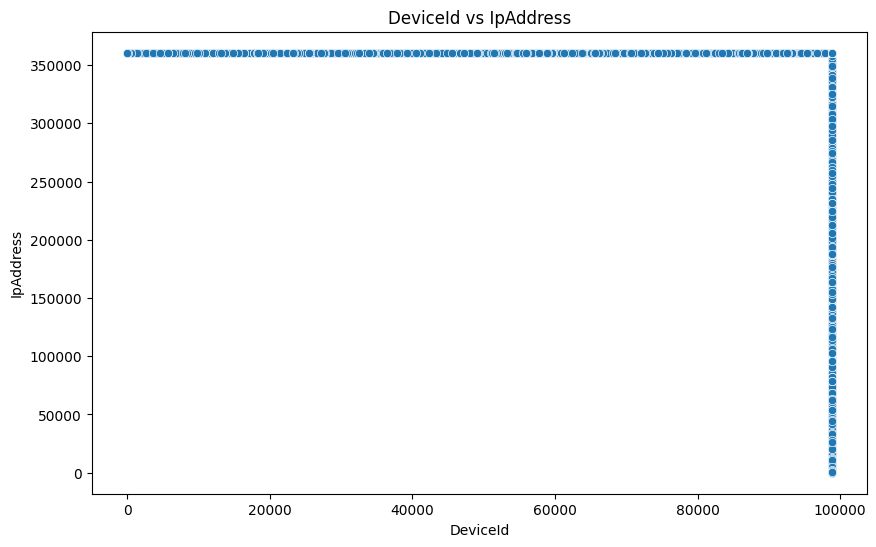

In [9]:
import matplotlib.pyplot as plt 
import seaborn as sns 

Numerical_columns=["DeviceId", "IpAddress"] 

plt.figure(figsize=(10,6)) 
sns.scatterplot(x=DfT[Numerical_columns[0]],y=DfT[Numerical_columns[1]]) 
plt.title(f"{Numerical_columns[0]} vs {Numerical_columns[1]}")
plt.xlabel(Numerical_columns[0]) 
plt.ylabel(Numerical_columns[1]) 

plt.show()

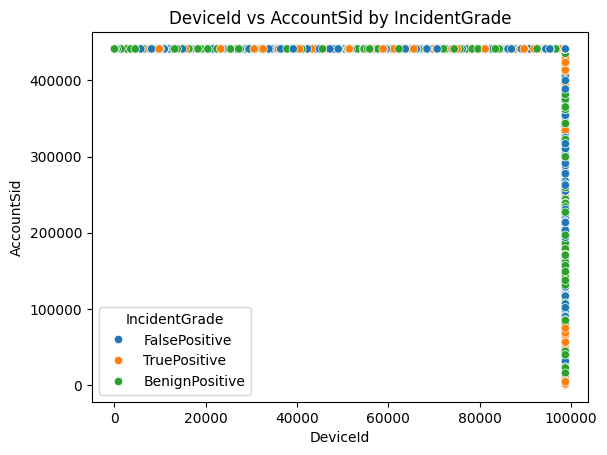

In [15]:
                                        #BIVARIATE ANALYSIS 

import matplotlib.pyplot as plt 
import seaborn as sns  

sns.scatterplot(x='DeviceId',y="AccountSid",hue='IncidentGrade', data=DfT)
plt.title('DeviceId vs AccountSid by IncidentGrade')
plt.show()





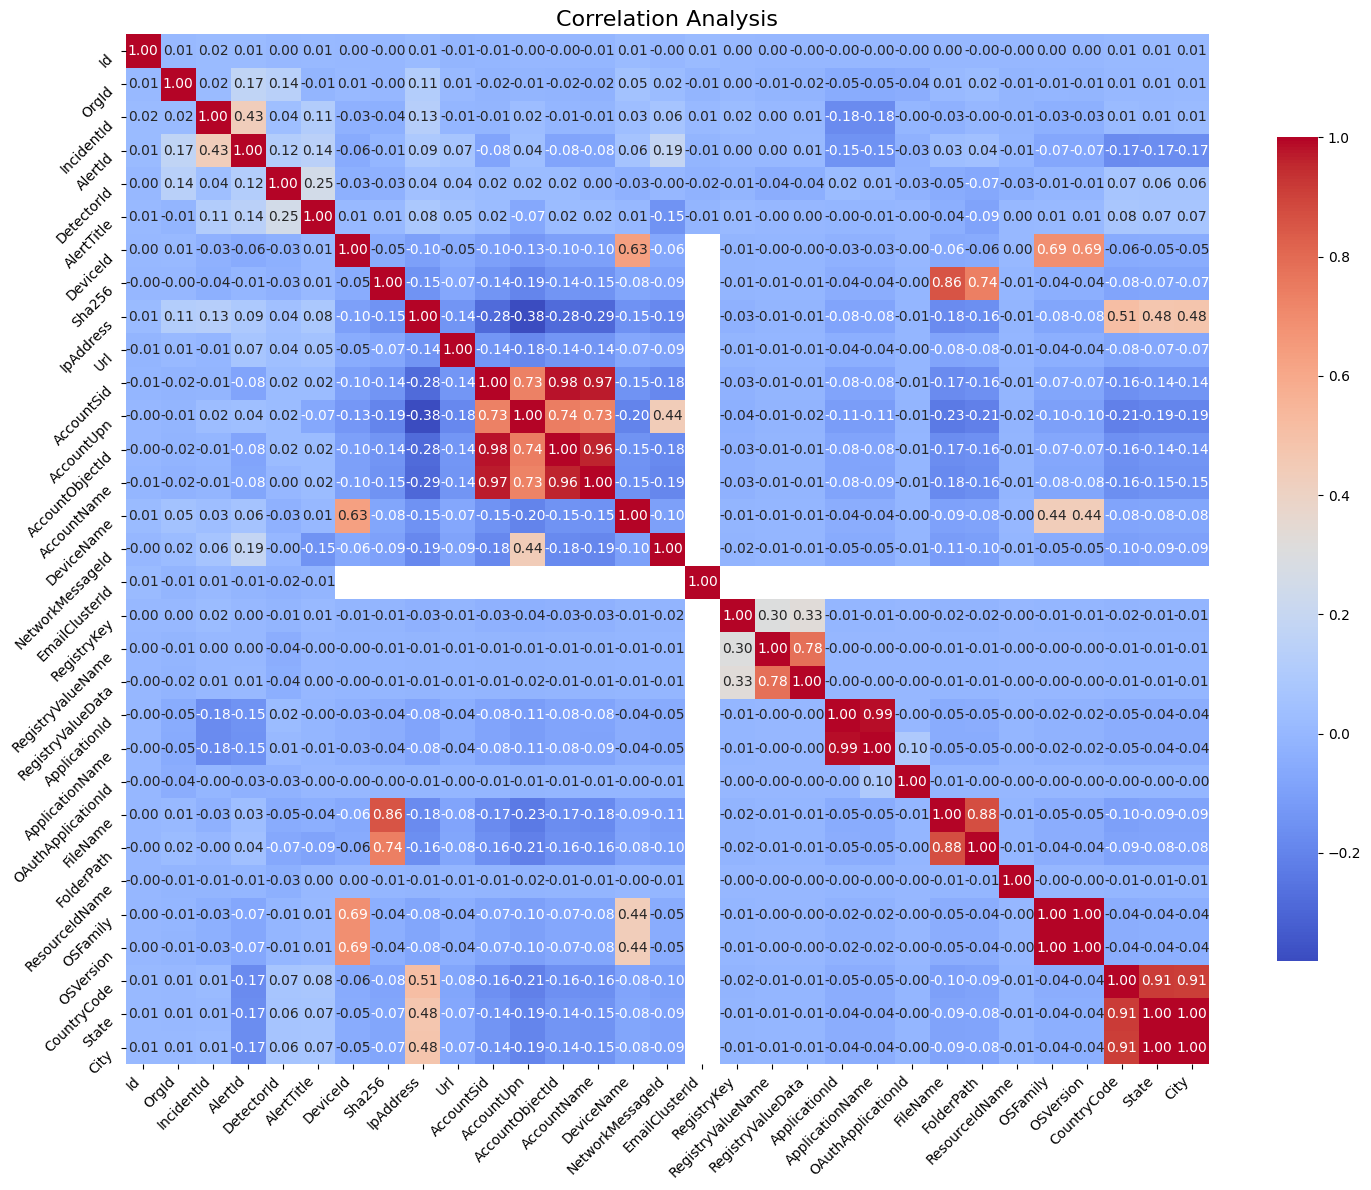

In [23]:
                                                  #CORRELATION ANALYSIS

import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = DfT.select_dtypes(include=["float64", "int64"])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(15, 12))  
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={'size': 10}, cbar_kws={'shrink': 0.8})


plt.title("Correlation Analysis", fontsize=16)


plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, va='top')


plt.tight_layout()
plt.show()

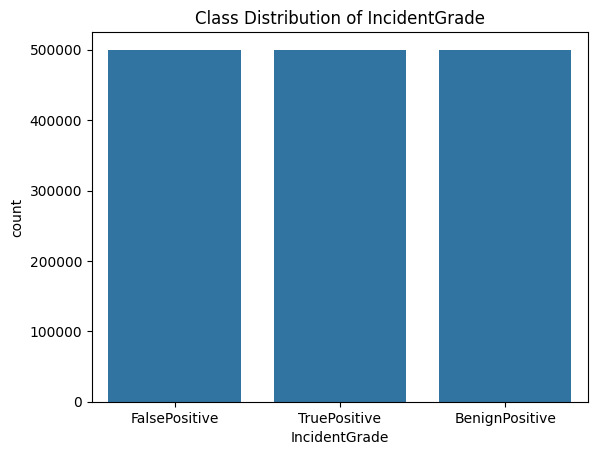

In [17]:
                               #VIEW OF CLASS IMBLANCE BY BARPLOT



import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='IncidentGrade', data=DfT)
plt.title('Class Distribution of IncidentGrade')
plt.show()



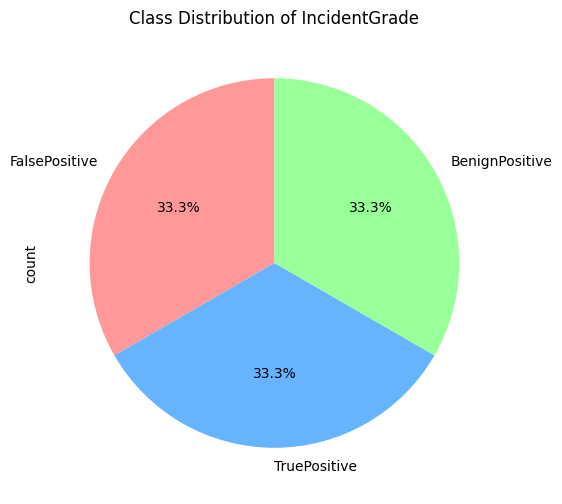

In [21]:
                                         #VIEW OF CLASS IMBLANCE BY PIE CHART

import seaborn as sns
import matplotlib.pyplot as plt

class_distribution = DfT['IncidentGrade'].value_counts()
plt.figure(figsize=(6, 6))
class_distribution.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Class Distribution of IncidentGrade')
plt.show()